In [38]:
%matplotlib inline
import pandas as pd

In [39]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [40]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [98]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head(15)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
8,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
9,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0


### What are the ten most common movie names of all time?

In [53]:
titles.groupby(['title']).size().sort_values(ascending=False).head(10)

title
Hamlet                  19
Macbeth                 15
Carmen                  15
The Outsider            11
Maya                    11
The Three Musketeers    11
Hero                    11
Othello                 11
Freedom                 10
Temptation              10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [66]:
titles[(titles.year<= 1939)&(titles.year>=1930)].groupby(["year"]).size().sort_values(ascending = False).head(3)

year
1937    1190
1936    1133
1938    1127
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [67]:
titles['decade'] = titles.year // 10 * 10

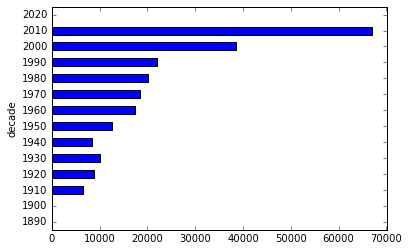

In [73]:
titles.groupby(["decade"]).title.count().plot(kind="barh")

### Plot the number of "Hamlet" films made each decade.

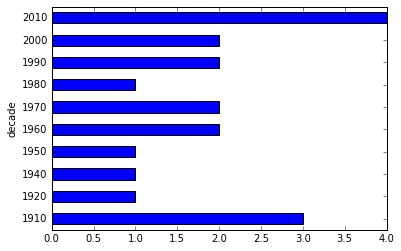

In [83]:
titles[titles.title == "Hamlet"].groupby(["decade"]).title.count().plot(kind="barh")

### Plot the number of "Rustler" characters in each decade of the history of film.

In [84]:
cast['decade'] = cast.year // 10 * 10

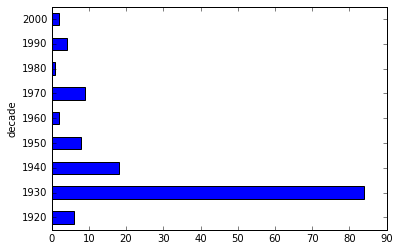

In [85]:
cast[cast.character == "Rustler"].groupby(["decade"]).title.count().plot(kind="barh")

### Plot the number of "Hamlet" characters each decade.

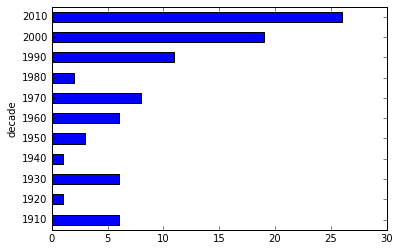

In [86]:
cast[cast.character == "Hamlet"].groupby(["decade"]).title.count().plot(kind="barh")

### What are the 11 most common character names in movie history?

In [90]:
cast.groupby(["character"]).title.count().sort_values(ascending = False).head(11)

character
Himself        19362
Dancer         11850
Extra          10690
Reporter        8046
Doctor          7321
Student         6929
Policeman       6801
Party Guest     6644
Nurse           6529
Bartender       6501
Minor Role      6172
Name: title, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [94]:
cast[cast.character == "Herself"].groupby(["name"]).title.count().sort_values(ascending=False).head(10)

name
Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Rekha                  5
Kareena Kapoor         5
Hillary Clinton        5
Caroline Rhea          5
Bunny Yeager           5
Name: title, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [97]:
cast[cast.character == "Himself"].groupby(["name"]).title.count().sort_values(ascending=False).head(10)

name
Adolf Hitler             98
Richard Nixon            44
Ronald Reagan            36
John F. Kennedy          29
Ron Jeremy               22
George W. Bush           22
Benito Mussolini         22
Winston Churchill        22
Bill Clinton             20
Franklin D. Roosevelt    20
Name: title, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [100]:
cast[cast.year == 1945].groupby(["name"]).title.count().sort_values(ascending = False).head(1)

name
Emmett Vogan    39
Name: title, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [101]:
cast[cast.year == 1985].groupby(["name"]).title.count().sort_values(ascending = False).head(1)

name
Mammootty    21
Name: title, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

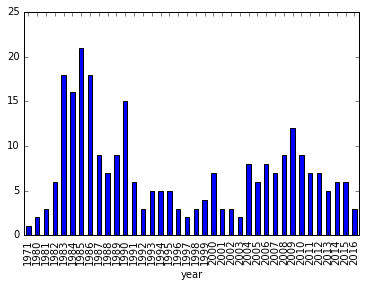

In [104]:
cast[cast.name == "Mammootty"].groupby(["year"]).title.count().plot(kind="bar")

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [114]:
cast[cast.character.str.startswith("Patron in")].groupby(["character"]).size().sort_values(ascending=False).head(10)

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in restaurant             3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [115]:
cast[cast.character.str.startswith("Science")].groupby(["character"]).size().sort_values(ascending=False).head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          9
Science Club Member      5
Science Fair Judge       5
Science Kid              5
Science Promo Cadet      5
Science Reporter         5
Science teacher          3
Science Fair Kid         3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

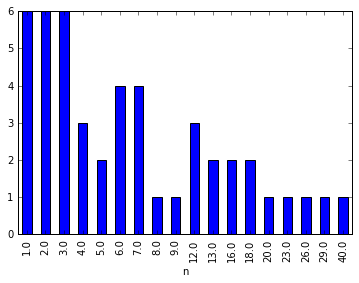

In [116]:
cast[cast.name == "Judi Dench"].groupby(["n"]).size().plot(kind="bar")

### Plot the n-values of Cary Grant's roles through his career.

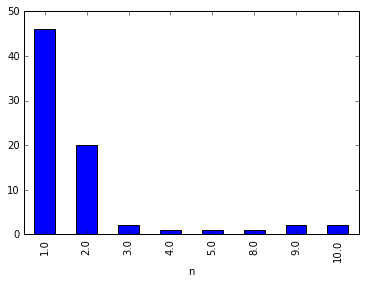

In [117]:
cast[cast.name == "Cary Grant"].groupby(["n"]).size().plot(kind="bar")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

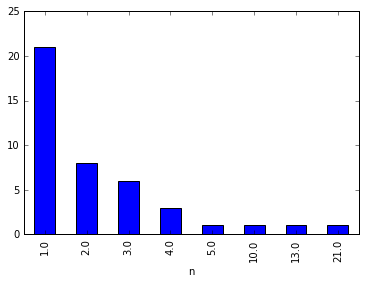

In [118]:
cast[cast.name == "Sidney Poitier"].groupby(["n"]).size().plot(kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [120]:
totalforactor = 0
for i in range(1950,1960):
    totalforactor = totalforactor + cast[(cast.n == 1)&(cast.year == i)&(cast.type=="actor")].n.count()
totalforactor

6563

In [121]:
totalforactress = 0
for i in range(1950,1960):
    totalforactress = totalforactress + cast[(cast.n == 1)&(cast.year == i)&(cast.type=="actress")].n.count()
totalforactress

2940

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [122]:
totalforactor = 0
for i in range(1950,1960):
    totalforactor = totalforactor + cast[(cast.n == 2)&(cast.year == i)&(cast.type=="actor")].n.count()
totalforactor

4530

In [123]:
totalforactress = 0
for i in range(1950,1960):
    totalforactress = totalforactress + cast[(cast.n == 2)&(cast.year == i)&(cast.type=="actress")].n.count()
totalforactress

4519